# Supervised Machine Learning

A code notebook for studying basic machine learning algorithms.

## Resources

* [matplotlib quick start guide](https://matplotlib.org/stable/tutorials/introductory/quick_start.html).
* [numpy learning section](https://numpy.org/learn/).

## Imports

The required libraries are:

* `numpy` to provide fast arrays in python.
* `matplotlib` for visualising data.
* `sklearn` for generating sample data.

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FormatStrFormatter)
import numpy as np
import sklearn.datasets
import math
%matplotlib inline

## Plot a test graph

Create a nice looking plot to test that the notebook is set up properly.

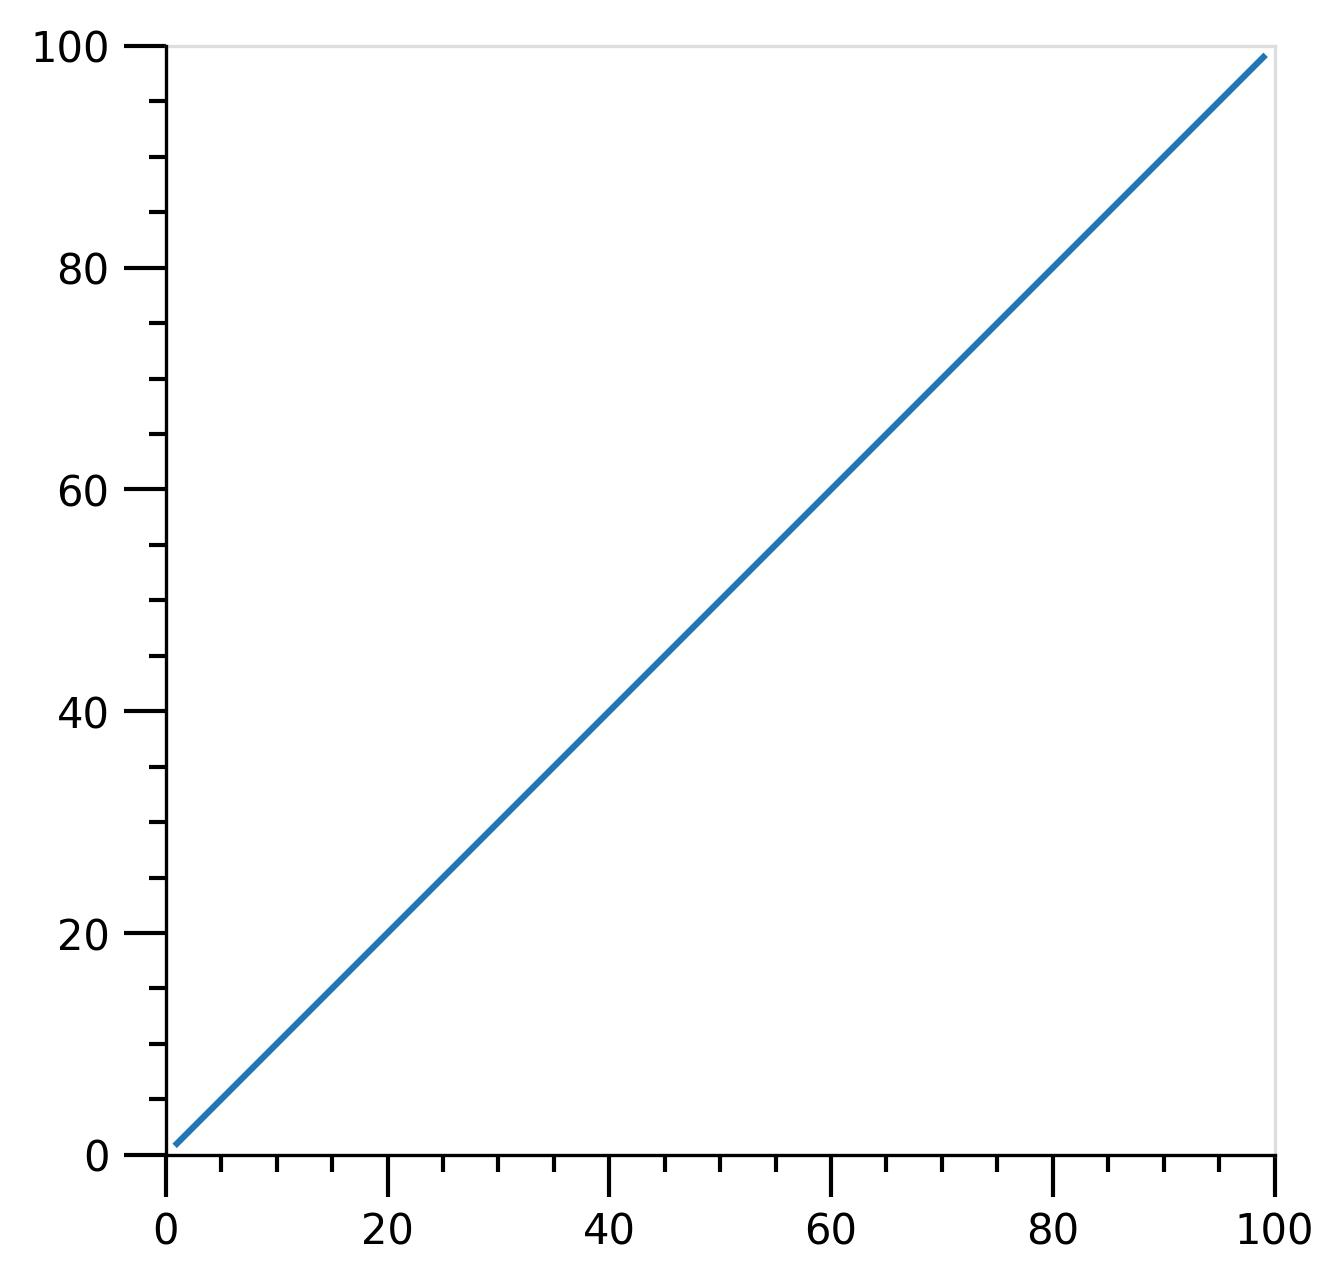

In [7]:
grid_color = "#dddddd"

f = plt.figure(dpi=300)
ax = f.add_subplot(1,1,1)
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.spines['top'].set_color(grid_color)
ax.spines['left'].set(zorder=10)
ax.spines['right'].set_color(grid_color)
ax.axis("square")

ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

ax.tick_params(which='minor', width=1, length=4, color="#000000")
ax.tick_params(which='major', width=1, length=10, color="#000000")

# ax.grid(which="minor", color=grid_color, linestyle="-", lw=0.5)
# ax.grid(which="major", color=grid_color, linestyle="-")

ax.plot([1,99], [1,99], marker="None", linestyle="-", markersize=1)

## Generate datasets

Use the `make_regression` function of scikit learn to generate a sample dataset with a single feature (see *univariate* below). Return the coefficient and create the linear function from which the dataset is generated.

In [33]:
r = sklearn.datasets.make_regression(n_samples = 200, n_features = 1, noise=20, coef=True)

x = r[0].ravel()
y = r[1]

m = r[2]

def f(w_1, x, w_0):
    return w_1 * x + w_0

z = np.linspace(-2, 2, 100)
w = f(m, z, 0)

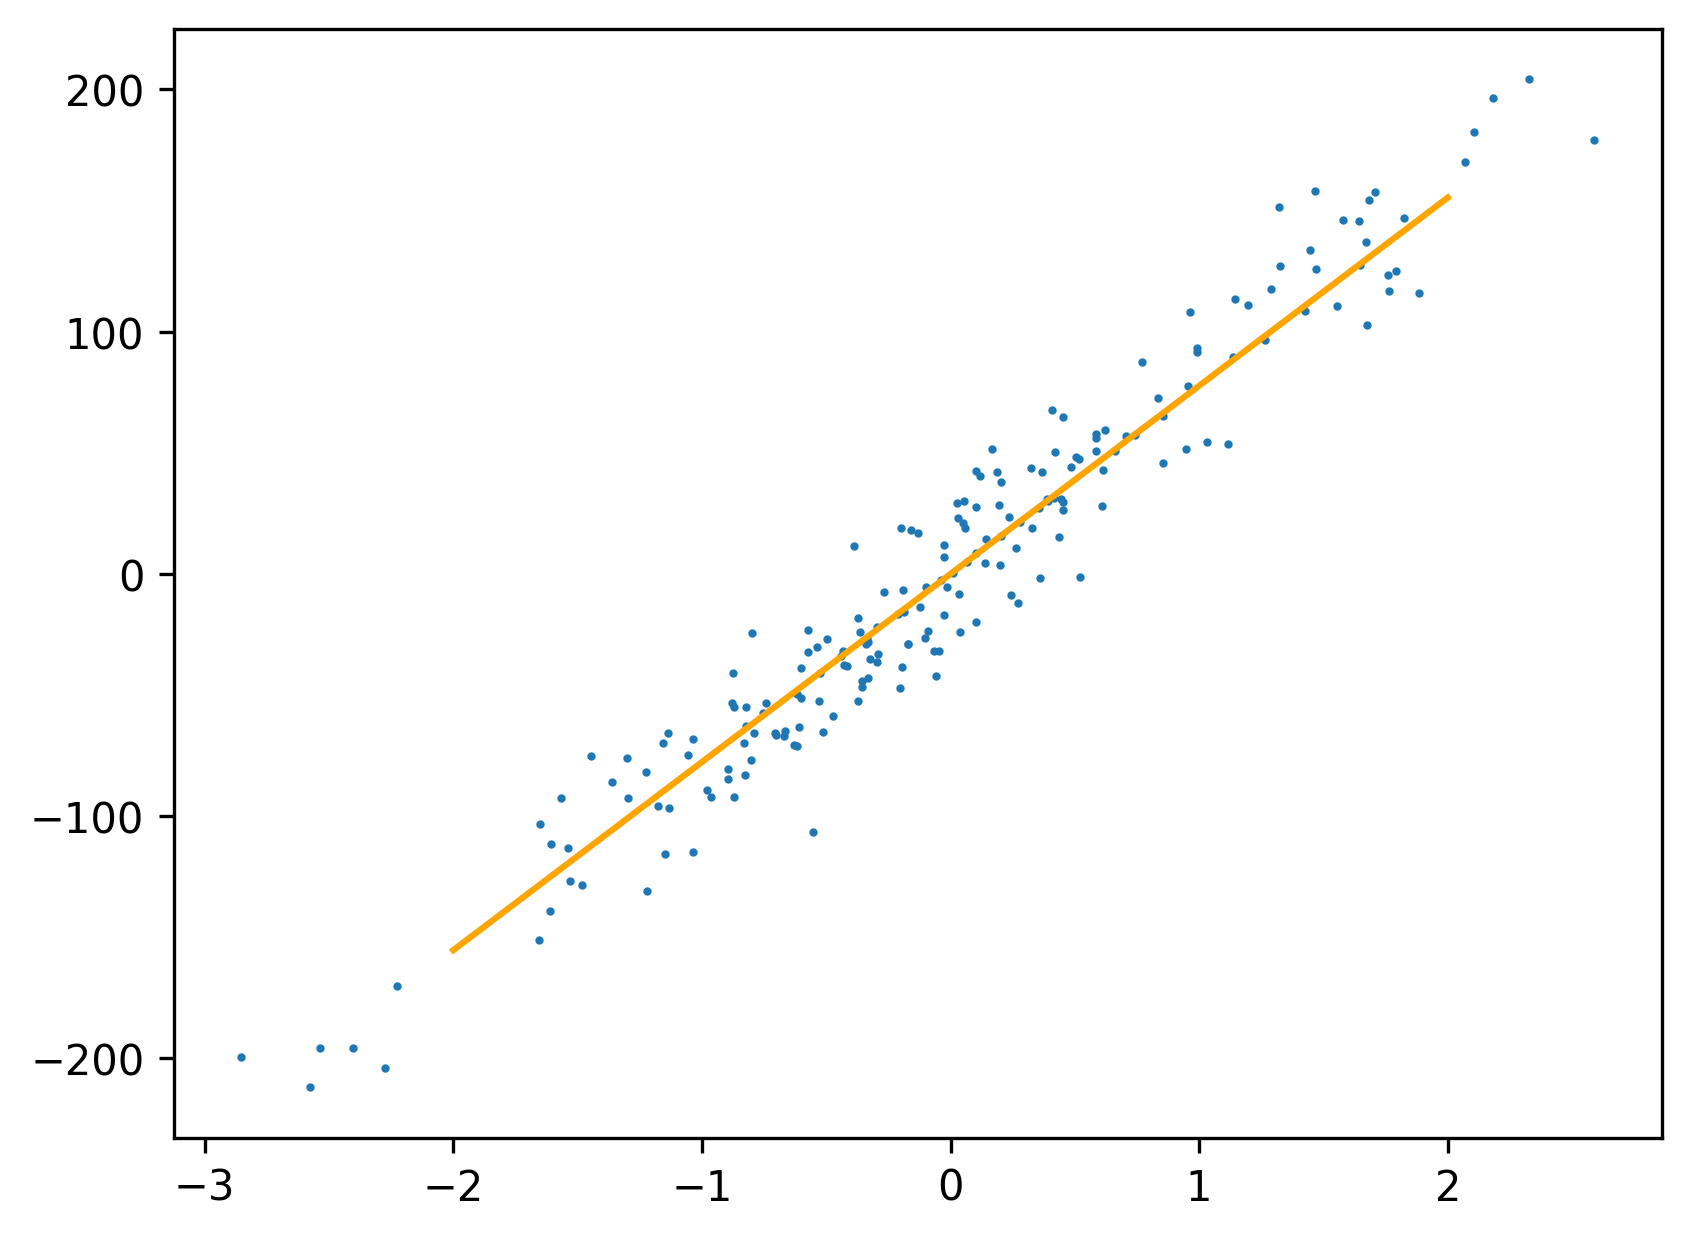

In [53]:
figure = plt.figure(dpi=300)
ax = figure.add_subplot(1,1,1)

# ax.set_xticks([])
# ax.set_yticks([])
ax.set_aspect('auto')
ax.scatter(x,y, s=1)
ax.plot(z, w, 'orange')

## Linear Regression

The process of fitting a straight line to a dataset is called *univariate linear regression*.

A linear function is of the form $y=mx+c$, or in data science $y=w_1x+w_0$. The vector $\mathbf{w}$ is the vector of weights in a linear equation: $\langle w_0, w_1 \rangle$. The function of $x$ with weights $\mathbf{w}$ is:

$$h_{\mathbf{w}}=w_1x+w_0$$

## Loss Function

The loss for a single example:

$$(h_{\mathbf{w}}(x) - y)^2$$

Average loss over many examples:

$$g(w_0, w_1) = \frac{1}{N}\Sigma_{n=1}^{N}(h_{\mathbf{w}}(x_n) - y_n)^2$$

These two functions, expressed in code:

In [71]:
def _mse(y_pred, y_actual):
    return (y_pred - y_actual) ** 2


def mse(y_actual, y_pred):
    loss = 0.0
    for i in range(y_actual.size):
        loss += _mse(y_pred[i], y_actual[i])
    return loss/y_actual.size

Compare the cost for the fitted line (the coefficeint is already know) with a line of gradient 1:

In [72]:
print(mse(y, f(m, x, 0)))
print(mse(y, f(1, x, 0)))

372.4735295647304
6579.559495638315


In [73]:
def gradient_descent(a, w_0, w_1, y, x):
    for i in range(x.size):
        w_0 -= (a * (f(w_1, x[i], w_0) - y[i]))
        w_1 -= (a * (f(w_1, x[i], w_0) - y[i]) * x[i])
    return w_0, w_1

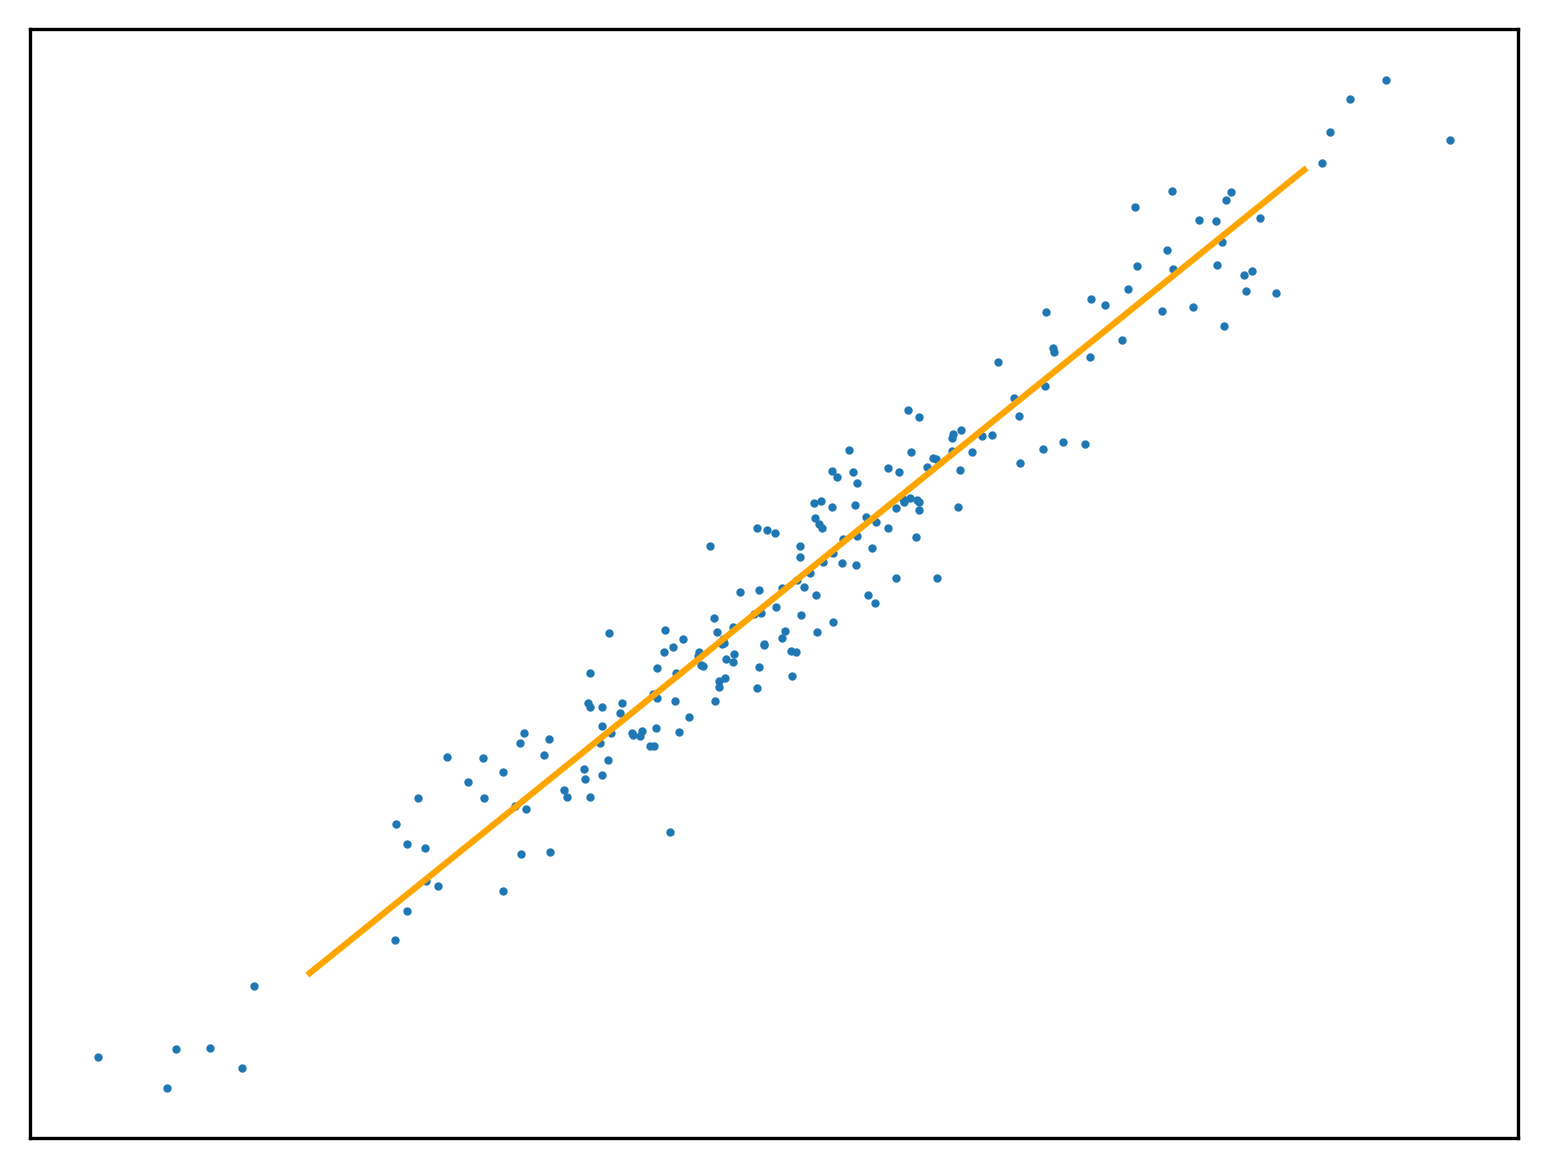

In [78]:
w_0 = w_1 = 0.0

w_0, w_1 = gradient_descent(0.1, w_0, w_1, y, x)

figure = plt.figure(dpi=300)
ax = figure.add_subplot(1,1,1)

ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
ax.scatter(x,y, s=1)
ax.plot(z, f(w_1, z, w_0), 'orange')